# Machine Learning | Decision Tree Laboratory Activity

**Name:** `[  Sherri Nicole S. Tilan  ]`

___

**Instructor/Professor:** Jocelyn B. Barbosa

**Course Code:** IT325 / IT3R9

*IT3R9*

### 🤖 Import Standard Libraries

In [83]:
# code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### 🔃 Load Dataset

- https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv
- <a href="https://github.com/jayachandru001/Heart-Failure-Prediction-">Data Description</a>

In [84]:
# code here
df=pd.read_csv('https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 🔎Examine Dataset

- Descriptive Statistics / Hypothesis Test
- Look for Null Values / Outliers

In [85]:
# code here
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [87]:
df.shape

(918, 12)

In [88]:
df.size

11016

In [89]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [90]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

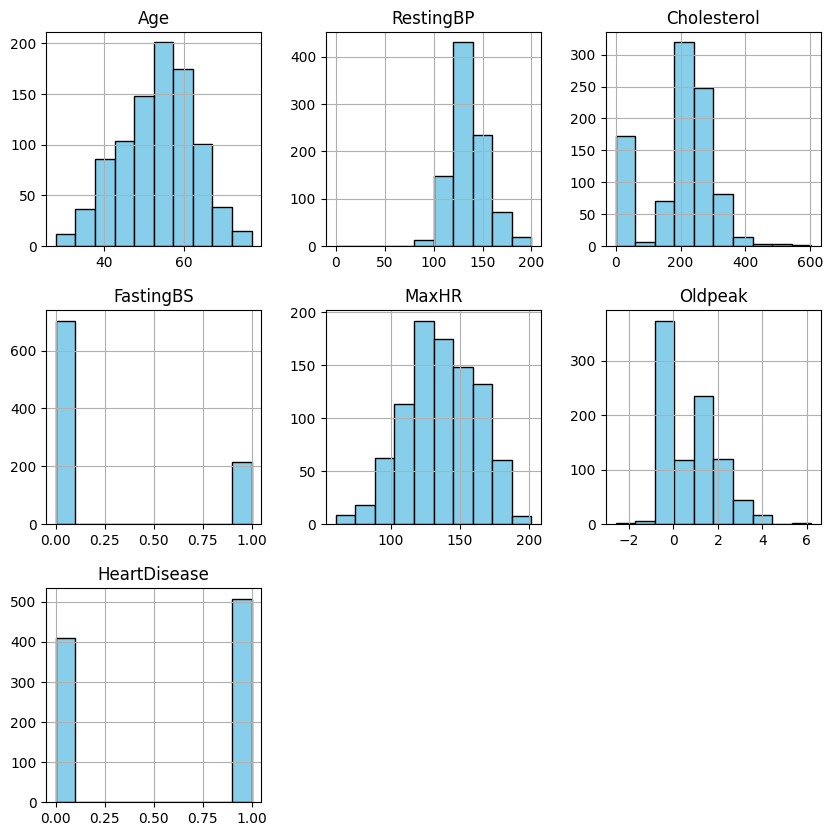

In [91]:
df.hist(figsize=(10, 10), color='skyblue', edgecolor='black')
plt.show()

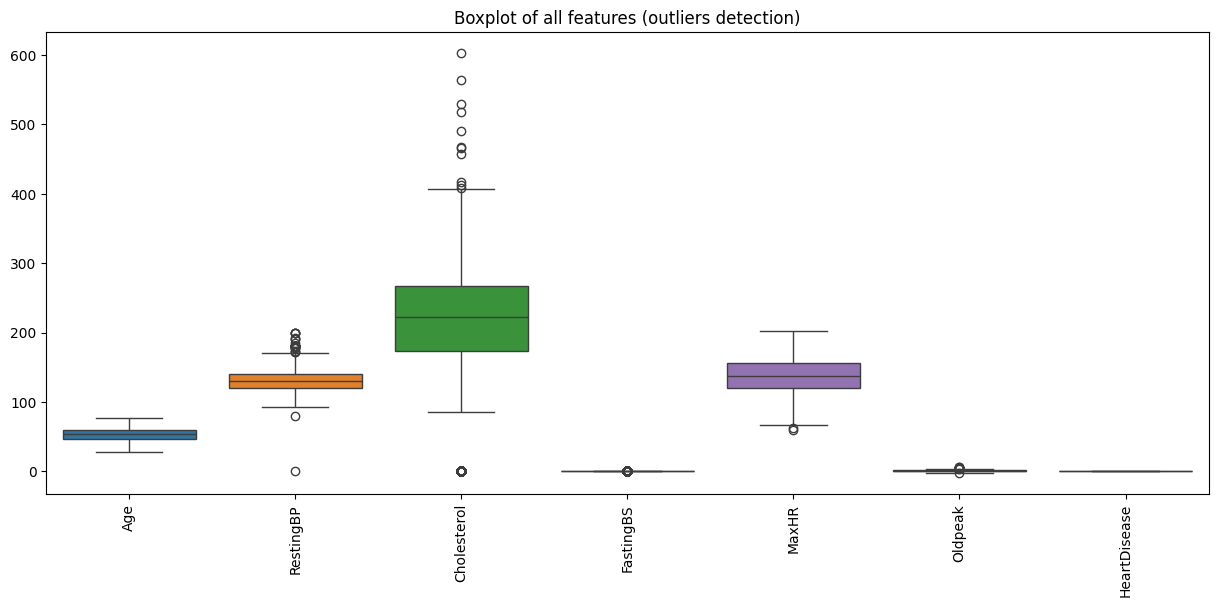

In [92]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title('Boxplot of all features (outliers detection)')
plt.xticks(rotation=90)
plt.show()

### 🧩Prepare Dataset
- Treat null values / outliers
- Data Transformation
- Train Test Split (75:25)

no null or na values, therefore treat outliers

In [93]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [94]:
def detect_outliers_iqr(data, cols):
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR)))
    return outlier_condition.any(axis=1)

In [95]:
outliers = detect_outliers_iqr(df, numeric_columns)
df_no_outliers = df[~outliers]

In [96]:
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (918, 12)
Dataset shape after removing outliers: (588, 12)


Data transformation

In [97]:
pd.get_dummies(df_no_outliers)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,140,241,0,123,0.2,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


Train Test Split (75:75)

In [98]:
target_column = 'HeartDisease'
x = df_no_outliers.drop(columns=[target_column])
y = df_no_outliers[target_column]

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)   

In [100]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()
categorical_features = ['sex', 'chestpaintype', 'RestingECG', 'ExerciseAngine', 'ST_slope']

### 👶🏼Train Decision Tree Model

- Experiment on the model parameters.

In [101]:
# code here
cat_encoder = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_encoder, categorical_cols)
    ], remainder='passthrough',
    verbose_feature_names_out=False
)

In [102]:
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [103]:
pipeline.fit(x_train, y_train)

c:\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])],
                                   verbose_feature_names_out=False)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### 🧪Evaluate Model
- Confusion Matrix

In [104]:
# code here
y_pred = pipeline.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


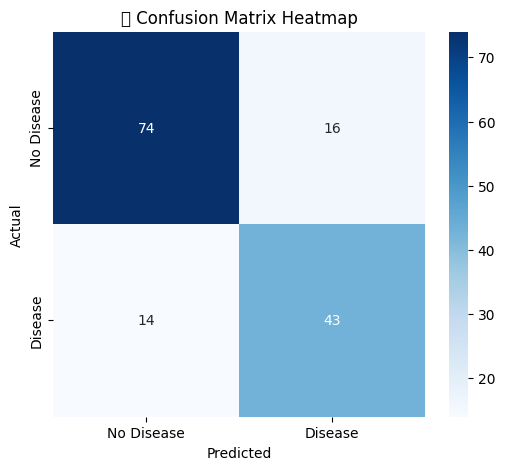

In [105]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("🧪 Confusion Matrix Heatmap")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [106]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.80


In [107]:
print("classification report")
print(classification_report(y_test, y_pred))

classification report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        90
           1       0.73      0.75      0.74        57

    accuracy                           0.80       147
   macro avg       0.78      0.79      0.79       147
weighted avg       0.80      0.80      0.80       147



### 📒Conclusion

In this activity, in order to determine if a person has heart disease based on many health related characteristcis, we developed a machine learning model using a Decision Tree Classifier. To ensure the data was trustworthy, we first cleaned the dataset by looking for null values, which there hadn't been, and eliminating outliers using the IQR method. We then divided the data in a 75:25 ration between training and testing sets.

To make the process of training the model and encoding categorical features easier, we used the pipeline. This maintained the code's efficiency and oragnization. We verified the model's accuracy using both the training and testing data after training. The model worked well, according to the findings, with excellent accurac on both sets.

